In [1]:
#!pip install tensorflow_datasets
import tensorflow_datasets as tfds
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

# Tarea 1 del curso:  Deep Learning I
### Primera parte: Genere el pipeline para un dato predefinido en https://www.tensorflow.org/datasets/catalog/overview 

In [2]:
#descargue Fashion-MNIST
(ds_train, ds_test), ds_info = tfds.load(
    name = 'fashion_mnist', #descargue Fashion-MNIST
    split= ['train', 'test'], # genere  datos para entrer y  datos de prueba
    shuffle_files=True,
    as_supervised=True,
    with_info= True # genere informacion
    )



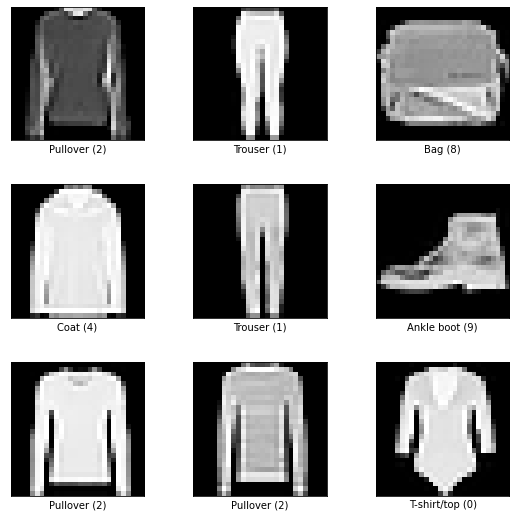

In [3]:
fig = tfds.show_examples(ds_train, ds_info)

In [4]:
#Rotulos y sus indices
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

In [5]:
## Preprocesamiento!!
def normalize_img(image,label ):
  image = tf.image.random_flip_left_right(image)
  image = tf.image.rot90(image) #rotar la imagen 90 grados. hint: tf.image.rot...
  label = tf.one_hot(label,depth=10)
  return image, label #retorne la imagen normalizada y tambien el label en one_hot.

## Pipeline!!
def data_load(data_ds,augmented=normalize_img,shuffle_=True ,batch_=10):
    data_ds = data_ds.map(
        lambda x, y: (normalize_img(x, y)), num_parallel_calls=tf.data.AUTOTUNE
    ) #complete codigo de map
    if shuffle_:
        data_ds = data_ds.shuffle(len(data_ds))
    data_ds = data_ds.batch(batch_) ## complete codigo de batches
    data_ds = data_ds.prefetch(tf.data.AUTOTUNE)
    return data_ds

In [6]:
## genere datos en  10 batches
data_train = data_load(ds_train) # complete codigo
data_test = data_load(ds_test,shuffle_=False) # complete codigo

(10, 28, 28, 1) tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(10, 10), dtype=float32)
(10, 28, 28, 1) tf.Tensor(
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(10, 10), dtype=float32)
(10, 28, 28, 1) tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.

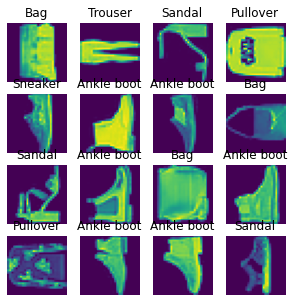

In [7]:
##imagenes de datos de entrenamiento 
plt.figure(figsize=(5, 5))
i=0
for ds,lb in data_train.take(16):
    print(ds.shape,lb)
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(ds[0].numpy())
    index = tf.argmax(lb, axis=1)
    plt.title('{}'.format(fashion_mnist_labels[index[0]]))
    plt.axis("off")
    i+=1

# Parte 2. Dataset estructurado "Titanic"
### Vamos a utilizar el dataset estructurado "Titanic" y dividimos los datos en entrenamiento y testeo.

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    name = #descargue 'titanic',
    split=['train[:70%]', 'train[30%:]'],
    shuffle_files=True,
    as_supervised=False,
    with_info=True)

In [ ]:
df_train = tfds.as_dataframe(ds_train, ds_info)
df_test = tfds.as_dataframe(ds_test, ds_info)
df_train.head()

In [ ]:
df.dtypes

In [ ]:
numeric_feature_names = ['fare']
categorical_feature_names = ['pclass','age']
label_name=['survived']
columns=numeric_feature_names+categorical_feature_names+label_name
df_train_features_numeric= df_train[numeric_feature_names]
df_test[columns].head()

In [ ]:
## Preprocesar edad!!
butckets=list(range(0,100,10))
layer = tf.keras.layers.Discretization(bin_boundaries=#complete codigo)
one_hot_layer = tf.keras.layers.CategoryEncoding(num_tokens=len(butckets), output_mode=#complete codigo. salida: one hot)

In [ ]:
##ejemplo de salida edad:
one_hot_layer(layer(df_test['age'].head()))

In [ ]:
## Preprocesar Fare, normalizacion!!
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(df_train_features_numeric)
print("Features mean: {}".format(normalizer.mean))
print("Features std: {}".format(normalizer.variance))

In [ ]:
##ejemplo de salida fare normalizado:
normalizer(np.expand_dims(df_test['fare'].head(),1))

In [ ]:
## Preprocesar pclass, como one-hot!
layer_onehot = tf.keras.layers.CategoryEncoding(#complete codigo)

In [ ]:
##ejemplo de salida pclass:
layer_onehot(np.expand_dims(df_test['pclass'].head(),1))

In [ ]:
def normalize(#complete codigo):
    age=one_hot_layer(layer(x['age']))
    fare =normalizer((tf.expand_dims(x['fare'],1)))
    pclass=layer_onehot(#complete codigo)
    features= tf.concat([age,fare,pclass],axis=1)
    return features,x['survived']

def df_to_dataset(ds, shuffle=True, batch_size=10):
  ds= tf.data.Dataset.from_tensor_slices(dict(#complete codigo))
  ds = ds.batch(#complete codigo)
  ds =ds.map(#complete codigo) 
  if shuffle:
    ds = ds.shuffle(#complete codigo)  
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [ ]:
batch_size = 5
train_ds = df_to_dataset(df_train, batch_size=batch_size)
test_ds = df_to_dataset(df_test, shuffle=False, batch_size=batch_size)

In [ ]:
for features,labels in train_ds.take(1).as_numpy_iterator():
    print(features,labels)


Se ha procesado datos numericos y categoricos!!!
# Punto 3. Conceptos. Machine Learning
#### En el readme.md del repositorio de la tarea, reponda lo siguiente:
-   Que son los datos de entrenamiento, validacion y prueba (train-test-validation)?
-   Investigue como entrenar una red neuronal
-   Que es el gradiente de una funcion y como se puede interpretar?

